## Input parameters


In [1]:
# tanyaMay24-trainset70shuffle2  -  DeepCut_resnetresnet_50_70shuffle2_130000forTask:tanya
#snapshot-130000

snapshot =  'snapshot-130000'

shuffleIndex =  2

trainFractionIndex =  0  #int(sys.argv[3])

test_images_path = '/is/ps2/calvarez2/DeepLabCut/test_images/images'
labeled_images_path = '/is/ps2/calvarez2/DeepLabCut/test_images/labeled_images'

max_input_size = 1000.0

## -------------------

In [2]:
def homogenizeImage(image , max_input_size):
    
    height, width, channels = image.shape

    if(bool(width * height > max_input_size*max_input_size) | bool(width > max_input_size) | bool(height > max_input_size) ):
        factor = (max_input_size*0.9)/max(height, width)
        image = cv2.resize(image, None, fx = factor, fy = factor, interpolation = cv2.INTER_CUBIC)
    
    return image

In [3]:
"""
Camila modification --

DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut
A Mathis, alexander.mathis@bethgelab.org
M Mathis, mackenzie@post.harvard.edu
This script evaluates a trained model at a particular state on the data set (images)
and stores the results in a pandas dataframe.
Script called from Step1_EvaluateModelonDataset.py
"""

import sys
import os
subfolder = os.getcwd().split('Evaluation-Tools')[0]
sys.path.append(subfolder)


# add parent directory: (where nnet & config are!)
sys.path.append(subfolder + "pose-tensorflow")
sys.path.append(subfolder + "Generating_a_Training_Set")

from myconfig import Task, date, Shuffles, scorer, TrainingFraction,snapshotindex

# Deep-cut dependencies
from config import load_config
from nnet import predict
from dataset.pose_dataset import data_to_input

# Dependencies for anaysis
import pickle
import skimage
import numpy as np
import pandas as pd
from skimage import io
import skimage.color
import auxiliaryfunctions
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2


print("Starting evaluation") #, sys.argv)

Starting evaluation


In [4]:
shuffle=Shuffles[shuffleIndex]
trainFraction=TrainingFraction[trainFractionIndex]

basefolder = os.path.join('..','pose-tensorflow','models')
folder = os.path.join('UnaugmentedDataSet_' + Task + date)

In [5]:
#######################################################################
# Load and setup CNN part detector as well as its configuration
#######################################################################

experimentname = Task + date + '-trainset' + str(int(trainFraction * 100)) + 'shuffle' + str(shuffle)
cfg = load_config(os.path.join(basefolder , experimentname , 'test' ,"pose_cfg.yaml"))
modelfolder = os.path.join(basefolder, experimentname)

cfg['init_weights'] = os.path.join(modelfolder,'train',snapshot)

trainingsiterations = (
    cfg['init_weights'].split('/')[-1]).split('-')[-1]
DLCscorer = 'DeepCut' + "_resnet" + str(cfg["net_type"]) + "_" + str(
    int(trainFraction *
        100)) + 'shuffle' + str(shuffle) + '_' + str(trainingsiterations) + "forTask:" + Task

print("Running ", DLCscorer, " with # of trainingiterations:", trainingsiterations)


('Running ', 'DeepCut_resnetresnet_50_70shuffle2_130000forTask:tanya', ' with # of trainingiterations:', '130000')


In [6]:
try:
    Data = pd.read_hdf(os.path.join("Results",DLCscorer + '.h5'),'df_with_missing')
    print("This net has already been evaluated!")
except :
    # Specifying state of model (snapshot / training state)
    cfg['init_weights'] = os.path.join(modelfolder,'train',snapshot)
    
    sess, inputs, outputs = predict.setup_pose_prediction(cfg)
    
    
    images_names = os.listdir(test_images_path)
    
    Numimages = len(images_names) #len(Data.index)
    PredicteData = np.zeros((Numimages,3 * len(cfg['all_joints_names'])))
    Testset = np.zeros(Numimages)
    
    print("Analyzing data...")
    
    ##################################################
    # Compute predictions over images
    ##################################################
    
    for imageindex, imagename in tqdm(enumerate(images_names)):
        image = io.imread(os.path.join(test_images_path, imagename),mode='RGB')
        image = skimage.color.gray2rgb(image)
        
        image = homogenizeImage(image, max_input_size)
        
        image_batch = data_to_input(image)
        
        
        # Compute prediction with the CNN
        outputs_np = sess.run(outputs, feed_dict={inputs: image_batch})
        scmap, locref = predict.extract_cnn_output(outputs_np, cfg)
        
        # Extract maximum scoring location from the heatmap, assume 1 person
        pose = predict.argmax_pose_predict(scmap, locref, cfg.stride)
        PredicteData[imageindex, :] = pose.flatten(
        )  # NOTE: thereby     cfg_test['all_joints_names'] should be same order as bodyparts!
      
        index = pd.MultiIndex.from_product(
            [[DLCscorer], cfg['all_joints_names'], ['x', 'y', 'likelihood']],
            names=['scorer', 'bodyparts', 'coords'])

        # Saving results:
        auxiliaryfunctions.attempttomakefolder("Results")

        DataMachine = pd.DataFrame(
            PredicteData, columns=index, index= images_names )
        DataMachine.to_hdf(os.path.join("Results",'Test_sample_'+DLCscorer + '.h5'),'df_with_missing',format='table',mode='w')
        print("Done and results stored for snapshot: ", snapshot)        

        

Instructions for updating:
Pass is_training directly to the network instead of the arg_scope.


Instructions for updating:
Pass is_training directly to the network instead of the arg_scope.


INFO:tensorflow:Restoring parameters from ../pose-tensorflow/models/tanyaMay24-trainset70shuffle2/train/snapshot-130000


INFO:tensorflow:Restoring parameters from ../pose-tensorflow/models/tanyaMay24-trainset70shuffle2/train/snapshot-130000
0it [00:00, ?it/s]

Analyzing data...


1it [00:00,  2.17it/s]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


2it [00:02,  1.49s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


3it [00:05,  1.88s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


4it [00:09,  2.25s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


5it [00:11,  2.36s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


6it [00:14,  2.38s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


7it [00:16,  2.39s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


8it [00:19,  2.46s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


9it [00:20,  2.27s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


10it [00:23,  2.40s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


11it [00:27,  2.51s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


12it [00:30,  2.55s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


13it [00:33,  2.54s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


14it [00:36,  2.59s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


15it [00:38,  2.60s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


16it [00:42,  2.64s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


17it [00:43,  2.57s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


18it [00:44,  2.49s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


19it [00:45,  2.42s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


20it [00:47,  2.36s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


21it [00:49,  2.37s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


22it [00:53,  2.43s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


23it [00:57,  2.48s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


24it [01:00,  2.52s/it]

Folder already exists!
('Done and results stored for snapshot: ', 'snapshot-130000')


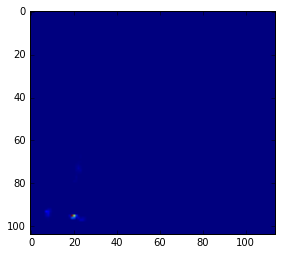

In [7]:
#score-map example

plt.imshow(scmap[:,:,-1])#.shape

In [8]:
DataMachine

scorer          DeepCut_resnetresnet_50_70shuffle2_130000forTask:tanya  \
bodyparts                                                     tail tip   
coords                                                               x   
download.jpeg                                           245.382314       
frame00.png                                             409.653399       
frame016.png                                            345.447286       
download_1.jpeg                                         182.991818       
frame012.png                                            250.050287       
frame018.png                                            417.062585       
frame068.png                                            279.147069       
down_3.jpeg                                             195.184207       
down_2.jpg                                               65.970319       
down_4.jpg                                              149.593805       
frame080_0.png                                          764.547743       
frame080_1.png                                          605.425808       
frame0157_0.png                                         513.543609       
frame0157_1.png                                         603.080955       
frame0157_2.png                                         316.336823       
frame0157_3.png                                         790.336275       
frame0157_4.png                                         244.470489       
frame015_1.png                                          209.627857       
frame023_4.png                                          524.867228       
frame083_1.png                                          192.807184       
frame018_0.png                                           25.869881       
frame0100_0.png                                         871.834779       
frame021_0.png                                          866.424254       
frame070_0.png                                           24.388112       

scorer                                                                  \
bodyparts                              back right shoulder               
coords                    y likelihood                   x           y   
download.jpeg    100.015515   0.265371          185.128764   74.701450   
frame00.png      344.335858   0.986123          443.690578  329.763583   
frame016.png     437.938697   0.801735          456.827526  376.762305   
download_1.jpeg  129.773888   0.004649          581.161187  368.587718   
frame012.png     407.790377   0.993865          360.458509  370.573653   
frame018.png     404.873542   0.999113          429.932432  334.674239   
frame068.png     385.129313   0.991591          361.292077  343.213976   
down_3.jpeg      405.002849   0.758334          255.898964  299.718558   
down_2.jpg       280.404029   0.777394          123.080457  221.616029   
down_4.jpg       515.811413   0.999925          188.280128  389.325397   
frame080_0.png   265.467260   0.252207          107.872085  314.612177   
frame080_1.png   592.604443   0.966933          239.044755  406.473053   
frame0157_0.png  453.951082   0.034321          785.192989  289.269589   
frame0157_1.png  570.275541   0.334576          239.639673  517.422320   
frame0157_2.png  868.800178   0.500355          370.068113  621.304640   
frame0157_3.png  787.670932   0.621141          474.349469  652.311032   
frame0157_4.png  215.016271   0.001174          443.914761  331.083973   
frame015_1.png   166.910273   0.058940          119.684728  395.804502   
frame023_4.png    64.984914   0.000575           -0.789176  126.750528   
frame083_1.png   594.375441   0.186980          236.025045  196.202442   
frame018_0.png   572.830355   0.197711          168.166083  488.083170   
frame0100_0.png  577.512818   0.896716          683.611337  508.363767   
frame021_0.png   599.385886   0.962213          722.146224  467.296521   
frame070_0.png   554.851141   0.520865          168.968230  399.749797   

sc

In [9]:
DLCscorer

'DeepCut_resnetresnet_50_70shuffle2_130000forTask:tanya'

# --- Store visualization of keypoints ----


In [10]:
import os.path
import sys
#sys.path.append(os.getcwd().split('Generating_a_Training_Set')[0])


from skimage import io
import matplotlib
%matplotlib inline
# matplotlib.use('Agg')
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [5,3]
from myconfig import Task, filename, bodyparts, Scorers
from myconfig import scorer as cfg_scorer

Labels = ['.', '+', '*']  # order of labels for different scorers

# https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
Colorscheme = get_cmap(len(bodyparts))

comparisonbodyparts = list(set(DataMachine.columns.get_level_values(1)))

scale = 1  # for plotting
msize = 15   #size of labels

scorer_machine = DLCscorer

thr_likelihood = 0.1  #likelihood > 10 %

In [11]:
# imagename = 'frame016.png' #'download_1.jpeg.jpeg' #'frame016.png'  #'frame016.png'

for imageindex, imagename in tqdm(enumerate(images_names)):


    imindex = np.where(
                np.array(DataMachine.index.values) == imagename)[0]

    # image = io.imread('/is/ps2/calvarez2/DeepLabCut/pose-tensorflow/models/UnaugmentedDataSet_tanyaMay24/data-tanya/' + imagename)
    image = io.imread(os.path.join(test_images_path, imagename),mode='RGB')
    image = skimage.color.gray2rgb(image)
    
    image = homogenizeImage(image, max_input_size)
    
    plane_name , extenstion = imagename.split('.')

    if extenstion != 'png':
        imagename = plane_name + '.png'


    plt.axis('off')

    if np.ndim(image)==2:
        h, w = np.shape(image)
    else:
        h, w, nc = np.shape(image)

    plt.figure(
        frameon=False, figsize=(w * 1. / 100 * scale, h * 1. / 100 * scale))
    plt.subplots_adjust(
        left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    plt.imshow(image, 'bone')
    for cc, scorer in enumerate(Scorers):
        for c, bp in enumerate(comparisonbodyparts):
            
            #cheeck likelihood > thr_likelihood %
            
            if (DataMachine[scorer_machine][bp]['likelihood'].values[imindex] > thr_likelihood):

                plt.plot(   
                        DataMachine[scorer_machine][bp]['x'].values[imindex],
                        DataMachine[scorer_machine][bp]['y'].values[imindex],
                        Labels[0],
                        color=Colorscheme(c),
                        alpha=.5,
                        ms=msize)
            else:
                
                plt.plot(   
                        DataMachine[scorer_machine][bp]['x'].values[imindex],
                        DataMachine[scorer_machine][bp]['y'].values[imindex],
                        Labels[-1],
                        color='w',
                        alpha=.5,
                        ms=msize)
                
            
            
    

    plt.xlim(0, w)
    plt.ylim(0, h)
    plt.axis('off')
    plt.subplots_adjust(
        left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.gca().invert_yaxis()
    plt.savefig(labeled_images_path + '/' + imagename , dpi=100) #dpi=100 = original size
    plt.close("all")
    
    



24it [00:15,  1.54it/s]
